# Linear Regression for Machine Learning

This is an educational project to learn about linear regression using real estate data. I put this project together while working through coursework on Dataquest.

The dataset we'll be using features houses sold from 2006 to 2010 in Ames, Iowa, USA. This data was collected by [Dr. Dean DeCock](https://www.truman.edu/faculty-staff/decock/) and can be downloaded [here](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt). A thorough description of the data can found in [this paper](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627).

In [1]:
#Import pandas library for data analysis.
import pandas as pd

#Avoid truncating number of columns displayed.
pd.options.display.max_columns = 100

#Read in data using sep='\t' for tab delimited.
data = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt', sep="\t")

#Explore first five rows of data.
print("This data set contains {} rows and {} columns.".format(data.shape[0], data.shape[1]))
data.head().style.hide_index()

This data set contains 2930 rows and 82 columns.


Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,526301100,20,RL,141.000000,31770,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.000000,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.000000,Unf,0.000000,441.000000,1080.000000,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.000000,0.000000,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.000000,Fin,2.000000,528.000000,TA,TA,P,210,62,0,0,0,0,nan,nan,nan,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.000000,11622,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,468.000000,LwQ,144.000000,270.000000,882.000000,GasA,TA,Y,SBrkr,896,0,0,896,0.000000,0.000000,1,0,2,1,TA,5,Typ,0,nan,Attchd,1961.000000,Unf,1.000000,730.000000,TA,TA,Y,140,0,0,0,120,0,nan,MnPrv,nan,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.000000,14267,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000000,TA,TA,CBlock,TA,TA,No,ALQ,923.000000,Unf,0.000000,406.000000,1329.000000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000000,0.000000,1,1,3,1,Gd,6,Typ,0,nan,Attchd,1958.000000,Unf,1.000000,312.000000,TA,TA,Y,393,36,0,0,0,0,nan,nan,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.000000,11160,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.000000,Gd,TA,CBlock,TA,TA,No,ALQ,1065.000000,Unf,0.000000,1045.000000,2110.000000,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.000000,0.000000,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.000000,Fin,2.000000,522.000000,TA,TA,Y,0,0,0,0,0,0,nan,nan,nan,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.000000,13830,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,791.000000,Unf,0.000000,137.000000,928.000000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000000,0.000000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000000,Fin,2.000000,482.000000,TA,TA,Y,212,34,0,0,0,0,nan,MnPrv,nan,0,3,2010,WD,Normal,189900


## Exploring the data

From the description of the data found [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627) I know there are 23 nominal variables, 23 ordinal, 14 discrete, and 20 continuous.

Here are some of the columns:

* `Lot Area`: Lot size in square feet.
* `Overall Qual`: Rates the overall material and finish of the house.
* `Overall Cond`: Rates the overall condition of the house.
* `Year Built`: Original construction date.
* `Low Qual Fin SF`: Low quality finished square feet (all floors).
* `Full Bath`: Full bathrooms above grade.
* `Fireplaces`: Number of fireplaces.

In [2]:
#Display information about each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Goal

The goal is to build a linear regression model that will predict the house sale price from its other attributes. On the way, I will find out which house attributes have the greatest impact on sale price and how well I can predict sale price from the attributes alone.

## Train, test, and target

I will split the data set in half and use one half to train the model I build and the other half to test it. Since my goal is to predict sale price, my target column will be `SalePrice`.

In [3]:
#Select first 1460 rows for training set.
train = data[:1460].copy()

#Select remaining rows for testing set.
test = data[1460:].copy()

#Set target column for predictions.
target = 'SalePrice'

## Simple linear regression

I will begin with the univariate case which can be modelled by the following equation:
$$\hat{y} = a_1x_1 + a_0$$
where $\hat{y}$ is the target, $x_1$ is the single feature, and $a_1$ and $a_0$ are parameter values. The goal is to find the optimal parameter values to describe the relationship between the feature and the target.

### Univariate feature selection

Linear regression models assume that the relationship between the feature(s) and the target is linear, so I want to pick a feature that seems to have a linear relationship with the target.

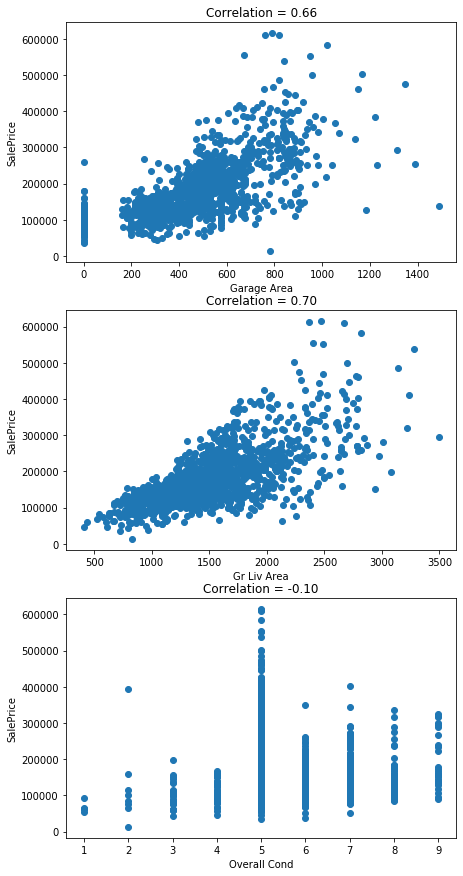

In [4]:
#Import matplotlib.pyplot for plotting.
import matplotlib.pyplot as plt

#Import numpy library for numerical functions.
import numpy as np

'''
Plot three features against target SalePrice to observe relationship.
Calculate the Pearson Correlation Coefficient of each feature with the target.
'''

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7,15))

ax1.scatter(train['Garage Area'], train[target])
ax1.set_xlabel('Garage Area')
ax1.set_ylabel('SalePrice')
corr = np.corrcoef(train[target],train['Garage Area'])[0][1]
ax1.title.set_text('Correlation = ' + "{:.2f}".format(corr))

ax2.scatter(train['Gr Liv Area'], train[target])
ax2.set_xlabel('Gr Liv Area')
ax2.set_ylabel('SalePrice')
corr = np.corrcoef(train[target],train['Gr Liv Area'])[0][1]
ax2.title.set_text('Correlation = ' + "{:.2f}".format(corr))

ax3.scatter(train['Overall Cond'], train[target])
ax3.set_xlabel('Overall Cond')
ax3.set_ylabel('SalePrice')
corr = np.corrcoef(train[target],train['Overall Cond'])[0][1]
ax3.title.set_text('Correlation = ' + "{:.2f}".format(corr))

plt.show()

In [5]:
num_cols = ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 
            'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF',
           '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
           'Bsmt Half Bath', 'Full Bath', 'Half Bath',
           'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
           'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area']

#### Without the instruction of DQ, how would one systematically go about exploring all of the features to choose the best one for univariate regression?

I thought to take a look at all the numerical attributes on scatter plots and calculate their correlation coefficients, then choose the best one. It makes sense to choose continuous rather than discrete, but is there a good explanation for why?


**Run below as code cell for all correlation scatter plots.**

#Plot all numerical features and display correlation coefficients when available. 
#Some columns are missing data points, so the corr is nan.

fig, ax = plt.subplots(len(num_cols), 1, figsize=(7,155))

for i in range(len(num_cols)):
    ax[i].scatter(train[num_cols[i]], train[target])
    ax[i].set_xlabel(num_cols[i])
    ax[i].set_ylabel('SalePrice')
    corr = np.corrcoef(train[target], train[num_cols[i]])[0][1]
    ax[i].title.set_text('Correlation = '+'{:.2f}'.format(corr))

In [6]:
#Calculate correlation in pandas instead of numpy.
all_num_cols = num_cols
all_num_cols.append('SalePrice')
corr_matrix = train[all_num_cols].corr()
corr_matrix['SalePrice'].sort_values()

Enclosed Porch    -0.165873
Overall Cond      -0.099395
Low Qual Fin SF   -0.060352
Bsmt Half Bath    -0.055288
BsmtFin SF 2       0.000770
3Ssn Porch         0.038699
Screen Porch       0.100121
Pool Area          0.145474
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Bsmt Full Bath     0.314536
Wood Deck SF       0.319104
Open Porch SF      0.344383
Lot Frontage       0.365075
Fireplaces         0.485683
BsmtFin SF 1       0.513160
Mas Vnr Area       0.516852
Full Bath          0.518194
Year Remod/Add     0.545219
Garage Yr Blt      0.561873
Year Built         0.591436
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Total Bsmt SF      0.683037
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

### Univariate feature selection (continued)

Of the three features plotted, `Gr Liv Area` demonstrates the greatest correlation with `SalePrice`. The correlation matrix confirms that `Gr Liv Area` is the continuous variable with greatest correlation with a correlation of `0.698990`.

With our newly chosen single feature, we can update our equation from above to the following:
$$\hat{y} = a_1 * Gr Liv Area + a_0$$

### Finding optimal parameters $a_0$ and $a_1$

Calculate the Residual Sum of Squares (RSS) for the difference between predicted and actual target values.
$$\sum_{i=1}^n (y_i - \hat{y_i})^2$$
Use scikit-learn library to easily try different parameters and find the optimal values.

In [7]:
#Import LinearRegression model.
from sklearn.linear_model import LinearRegression

#Instantiate model.
lr = LinearRegression()

#Use fit method to fit the feature to the target.
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

#Get intercept and coef attributes to return optimal parameters.
a0 = lr.intercept_
a1 = lr.coef_
print(a0, a1)

5366.821710056014 [116.86624683]


Using the parameters found above, the linear equation becomes:

$$\hat{y} = SalePrice = 116.86624683*Gr Liv Area + 5366.821710056014$$

This means that for every square foot in above ground living area, the home's value is expected to increase by \$116.87.

In [8]:
#Predict prices based on this model on both training and testing sets.
predict_train = lr.predict(train[['Gr Liv Area']])
predict_test = lr.predict(test[['Gr Liv Area']])

from sklearn.metrics import mean_squared_error

#Calculate RMSE of model on training and testing data sets.
train_rmse = (mean_squared_error(train['SalePrice'], predict_train))**.5
test_rmse = (mean_squared_error(test['SalePrice'], predict_test))**.5

print(train_rmse, test_rmse)

56034.3620014128 57088.25161263909


### Checking for overfitting

Use the model to predict values for both the training and testing data sets. If the the rmse for the training set is much lower than the rmse for the testing set, it means the model is overfitted and not likely to give accurate predictions.

---

## Multiple Linear Regression

$$\hat{y} = a_0 + a_1x_1 + ... + a_nx_n$$

In [9]:
#Use these two features to build multivariate model.
cols = ['Overall Cond', 'Gr Liv Area']

#Instantiate model.
lr2 = LinearRegression()

#Fit model using two features listed above.
lr2.fit(train[cols], train['SalePrice'])

#Make predictions on both training and testing data.
lr2_predict_train = lr2.predict(train[cols])
lr2_predict_test = lr2.predict(test[cols])

train_rmse_2 = (mean_squared_error(train['SalePrice'], lr2_predict_train))**.5
test_rmse_2 = (mean_squared_error(test['SalePrice'], lr2_predict_test))**.5

print(train_rmse_2, test_rmse_2)

56032.39801525867 57066.90779448559


---
---
# Feature Selection

Begin with all numerical columns (by selecting `int` and `float` dtypes from data). Drop columns that aren't linear in nature or that have missing values.

In [10]:
numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]

### Feature-target correlation

In [11]:
train_subset = train[full_cols_series.index]
corr_matrix = train_subset.corr()
sorted_corrs = corr_matrix['SalePrice'].abs().sort_values()
sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

Choose features with correlation > 0.3. Try different correlation cutoff values and see where the model stops improving.

In [12]:
strong_corrs = sorted_corrs[sorted_corrs>0.3]
strong_corrs

Wood Deck SF     0.319104
Open Porch SF    0.344383
TotRms AbvGrd    0.483701
Fireplaces       0.485683
Full Bath        0.518194
1st Flr SF       0.657119
Garage Area      0.662397
Garage Cars      0.663485
Gr Liv Area      0.698990
Overall Qual     0.804562
SalePrice        1.000000
Name: SalePrice, dtype: float64

### Feature-feature correlation

Look for collinearity (when 2 features are highly correlated and risk duplicating information). Use a seaborn heatmap.

In [13]:
corrmat = train_subset[strong_corrs.index].corr()
corrmat

,Wood Deck SF,Open Porch SF,TotRms AbvGrd,Fireplaces,Full Bath,1st Flr SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
Wood Deck SF,1.000000,0.039738,0.148162,0.209153,0.180358,0.206013,0.219300,0.227391,0.238396,0.260258,0.319104
Open Porch SF,0.039738,1.000000,0.222774,0.148664,0.255968,0.191891,0.218563,0.190875,0.321806,0.319954,0.344383
TotRms AbvGrd,0.148162,0.222774,1.000000,0.307189,0.517731,0.360595,0.295586,0.343422,0.807301,0.360203,0.483701
Fireplaces,0.209153,0.148664,0.307189,1.000000,0.245036,0.429662,0.302616,0.342560,0.460746,0.386205,0.485683
Full Bath,0.180358,0.255968,0.517731,0.245036,1.000000,0.341061,0.402743,0.468295,0.625981,0.505102,0.518194
1st Flr SF,0.206013,0.191891,0.360595,0.429662,0.341061,1.000000,0.477281,0.441351,0.515404,0.490056,0.657119
Garage Area,0.219300,0.218563,0.295586,0.302616,0.402743,0.477281,1.000000,0.890509,0.465366,0.581106,0.662397
Garage Cars,0.227391,0.190875,0.343422,0.342560,0.468295,0.441351,0.890509,1.000000,0.498711,0.609088,0.663485
Gr Liv Area,0.238396,0.321806,0.807301,0.460746,0.625981,0.515404,0.465366,0.498711,1.000000,0.562903,0.698990
Overall Qual,0.260258,0.319954,0.360203,0.386205,0.505102,0.490056,0.581106,0.609088,0.562903,1.000000,0.804562


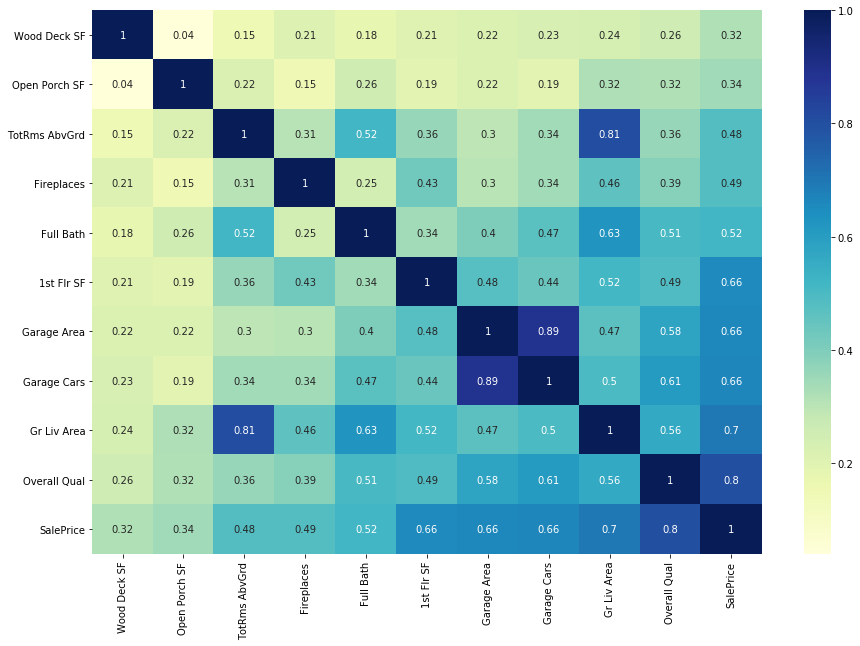

In [14]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, cmap="YlGnBu", annot=True)

#### Removing collinear features
There is a high correlation (0.89) between `Garage Area` and `Garage Cars` and (0.81) between `Gr Liv Area` and `TotRms AbvGrd`. These pairs of features represent related data. I'll keep the features that are continuous variables and drop the discrete features.

In [15]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

## Testing

Check that testing data has no missing values for selected features.

In [16]:
print(test[final_corr_cols.index].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB
None


In [17]:
#Drop row with missing value.
clean_test = test[final_corr_cols.index].dropna()

In [18]:
features = final_corr_cols.drop(['SalePrice']).index

#Build model, run predictions on train & test to check for overfitting.
lr = LinearRegression()
lr.fit(train[features], train[target])
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_rmse = (mean_squared_error(train[target], train_predictions))**0.5
test_rmse = (mean_squared_error(clean_test[target], test_predictions))**0.5

print(train_rmse, test_rmse)

34173.97629185852 41032.02612019769


## Variance of features

Rescale the columns to make direct comparisons between them.

In [19]:
unit_train = (train[features] - train[features].min()) / (train[features].max() - train[features].min())

Features with too low variance won't be informative.

In [20]:
unit_train.var().sort_values()

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

In [21]:
#Drop column with lowest variance.
features = features.drop('Open Porch SF')

#Build model, run predictions on train & test to check for overfitting.
lr = LinearRegression()
lr.fit(train[features], train[target])
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_rmse_2 = (mean_squared_error(train[target], train_predictions))**0.5
test_rmse_2 = (mean_squared_error(clean_test[target], test_predictions))**0.5

print(train_rmse_2, test_rmse_2)

34372.696707783965 40591.427024377364


### Result

`train_rmse` increased, possibly meaning without the less informative column the model is less overfitted. `test_rmse` decreased meaning the predictions on the test set were more accurate.

---
---
# Gradient Descent

Gradient descent is one of two common ways for finding optimal parameter values for a model. In model fitting (finding optimal parameter values), the goal is to minimize the mean squared error between actual and predicted values. Mean squared error is given by:

$$MSE = \frac{1}n \sum_{i=1}^n (y_i - \hat{y_i})^2$$

The main challenges with gradient descent are:
- choosing good initial parameter values
- choosing a good learning rate<br>
Use hyperparameter optimization to help choose good values for these static parameters.

## Single parameter function

In [22]:
def derivative(a1, xi_list, yi_list):
    # return the derivative at the current value of a1
    n = len(yi_list)
    return (2/n) * sum(xi_list*(a1*xi_list - yi_list))

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)

param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150)
final_param = param_iterations[-1]

In [23]:
final_param

120.14219147202738

## Dual parameter function

In [24]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += (a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)

a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150, 1000)

In [25]:
a1_params

[150,
 105.34801721547944,
 126.13471917628125,
 116.45794862200977,
 120.96274606972909,
 118.86564116059868,
 119.84189984026605,
 119.38742488614261,
 119.59899502291616,
 119.50050320781361,
 119.54635359313434,
 119.52500879150305,
 119.53494516153384,
 119.53031930255781,
 119.53247255390217,
 119.53146994657168,
 119.53193647656232,
 119.53171908350993,
 119.53182007507831,
 119.53177285001942,
 119.53179462379771]

---
---
# Ordinary Least Squares (OLS)

Linear equation:

$$\hat{y} = a_0 + a_1x_1 + ... + a_nx_n$$

Matrix form:

$$Xa = \hat{y}$$

where $X$ is an $m x n$ matrix containing the $n$ training features, $a$ is a single row matrix containing the $n$ optimal paramters, and $\hat{y}$ is a single column matrix containing the $n$ predicted values.

In [26]:
features = ['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual']

X = train[features]
X.insert(0, 'bias', 1)
y = train['SalePrice']

X.head().style.hide_index()

bias,Wood Deck SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual
1,210,2,1,1656,528.000000,1656,6
1,140,0,1,896,730.000000,896,5
1,393,0,1,1329,312.000000,1329,6
1,0,2,2,2110,522.000000,2110,7
1,212,1,2,928,482.000000,1629,5


## OLS estimation

The OLS estimation formula results in the optimal parameter vector $a$:

$$a = (X^TX)^{-1}X^Ty$$

In [27]:
ols_estimation = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)), np.transpose(X)), y)
ols_estimation

array([-1.12764871e+05,  3.78815268e+01,  7.08698430e+03, -2.22197281e+03,
        4.31853639e+01,  6.48808564e+01,  3.87112549e+01,  2.45531837e+04])

The above matrix of parameter values $a$ is the solution for when the derivative of the cost function is equal to zero. With these parameter values, the cost function (or mean squared error) is minimized.

---
---
# Processing and Transforming Features 
<**Feature Engineering**>

Domain knowledge helps to engineer better features. There are also domain-independent ways to create better features.

Filter training data to get only columns with no missing values.

In [28]:
#Get series of count of missing values in each column.
missing_vals = train.isnull().sum()
#Get series of only columns with no missing values.
no_mv_cols = missing_vals[missing_vals == 0]
#Use above series index to return dataframe with no missing values.
df_no_mv = train[no_mv_cols.index]

## Find categorical features
Categorical features are features that are listed as strings but have limited possible values (or categories). We can transform these categorical features into numerical representations and then use them in the model.

### Categorical variables
Pandas has the option to create categorical variables which offer advantages such as saving memory and sorting logically instead of lexically. When pandas converts a column (with no missing values), it assigns a code to each unique values in the column.

In [29]:
#Select text columns with no missing values.
text_cols = df_no_mv.select_dtypes(include=['object']).columns

#Print number of unique categories in each text column.
for col in text_cols:
    print(col+':', len(train[col].unique()))

MS Zoning: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Paved Drive: 3
Sale Type: 9
Sale Condition: 5


In [30]:
#Convert text columns to categorical data type.
train[text_cols] = train[text_cols].astype('category')

#Return the categorical codes for the 'Utilities' column.
train['Utilities'].cat.codes.value_counts()

0    1457
2       2
1       1
dtype: int64

### Dummy variables

The integers assigned to the categories do not have any linear correlation with the target variable. To be able to use categorical variables in regression analysis, I will use dummy variables which assign binary numbers to qualitative values.

It's important to first create categorical variables and then convert those to dummy columns because of the different ways `object` and `category` data types are handled by algorithms when the columns in train and test sets don't match exactly. See [this explanation](https://community.dataquest.io/t/what-purpose-does-conversion-to-category-dtype-serve/548179).

In [31]:
#Create dummy columns for each text column and replace original.
for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]
    
#Could instead use `train = pd.get_dummies(train, columns=text_columns)`
#but column naming scheme would be different.

## Making use of years

Year values in and of themselves don't provide useful correlation with other features, but years passed between certain events do. For instance, how old a house is or how long it's been since it was remodeled could correlate with a house's price. I'll create some new columns to make better use of the year data.

In [32]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']

--> why use how many years until it was remodeled versus how many years since it's been remodeled and/or how old the house is?

## Handling missing values

There are 1460 total observations in this data set with around 80 useful features. For so few observations it's better to impute missing values rather than remove entire observations.

Focus on columns that have between 1 and 365 (25% of 1460) missing values. The acceptable cutoff can be better determined with domain knowledge.

In [33]:
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()
cols_365_missing = train_null_counts[(train_null_counts > 0) & (train_null_counts < 365)]
df_missing_values = train[cols_365_missing.index]
df_missing_values.isnull().sum()

Lot Frontage      249
Mas Vnr Type       11
Mas Vnr Area       11
Bsmt Qual          40
Bsmt Cond          40
Bsmt Exposure      41
BsmtFin Type 1     40
BsmtFin SF 1        1
BsmtFin Type 2     41
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type        74
Garage Yr Blt      75
Garage Finish      75
Garage Qual        75
Garage Cond        75
dtype: int64

In [34]:
df_missing_values.dtypes

Lot Frontage      float64
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Cond        object
dtype: object

In [35]:
#Only select float columns.
float_cols = df_missing_values.select_dtypes(include=['float'])

#Returns a data frame with missing values replaced with mean of that column.
fill_with_mean = float_cols.fillna(float_cols.mean())

#Check for missing values.
fill_with_mean.isnull().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
dtype: int64

---
---
# Predicting House Sale Prices

## Set up functions

In [36]:
train = data[0:1460]
train.shape

(1460, 82)

In [37]:
def transform_features(train):
    '''
    Select which features to transform by dropping
    features with more than 25% values missing and other
    unwanted features.
    
    Transform features into proper formats.
    
    Returns a new dataframe rather than modifying the input.
    '''
    return train

In [38]:
def select_features():
    return train[['Gr Liv Area', 'SalePrice']]

In [39]:
def train_and_test():
    train = data[0:1460]
    test = data[1460:]
    train_num = select_features().select_dtypes(include=['float'])
    train_num_feat = train_num.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train_num_feat, train['SalePrice'])
    train_predict = lr.predict(train_num_feat)
    test_predict = lr.predict(test[train_num_feat.index])
    rmse_train = (mean_squared_error(train['SalePrice'], train_predict)**0.5)
    rmse_test = (mean_squared_error(test['SalePrice'], test_predict)**0.5)

## Transform features

Succeeding in predictive modeling is highly dependent on the quality of features. 
    
- remove features with many missing values (>25% or other chosen cutoff)
- dive deeper into potential categorical features
- transform text and numerical columns
- remove columns that leak information about the sale (don't really understand this yet)
- combine features to create new features that better capture the information (like difference in years vs just the year)
- read data documentation for each column to determine what transformations are necessary
- for columns missing <5% values, replace with mode (dq instruction)
- drop columns not useful for ML

### Remove features with many missing values (>25% or other chosen cutoff)

In [40]:
cutoff_25 = 0.25*len(train)
train_missing = train.isnull().sum()
train_low_missing_cols = train_missing[train_missing<cutoff_25]
train_low_missing = train[train_low_missing_cols.index].copy()

### For columns missing <5% values, replace with mode

-> why mode? so that we can apply this to numerical and non-numerical columns alike? would it not be better to use mean for numerical columns? is mode easier/computationally cheaper so better overall?

In [41]:
cutoff_5 = 0.05*len(train)
train_super_low_missing_cols = train_missing[train_missing<cutoff_5]
train_super_low_missing = train[train_super_low_missing_cols.index].copy()
train_super_low_missing.fillna(train_super_low_missing.mode())

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,907253060,60,RL,10316,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,735.0,Unf,0.0,257.0,992.0,GasA,Ex,Y,SBrkr,992,873,0,1865,1.0,0.0,2,1,3,1,Gd,7,Typ,1,3.0,839.0,Y,0,184,0,0,0,0,0,6,2008,WD,Normal,235000
1456,1457,907253110,60,RL,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,227.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1257.0,1257.0,GasA,Ex,Y,SBrkr,1290,871,0,2161,0.0,0.0,2,1,3,1,Gd,8,Typ,1,2.0,570.0,Y,0,84,0,0,0,0,0,6,2008,WD,Normal,230500
1457,1458,907254020,60,RL,9066,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,320.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,668.0,Unf,0.0,336.0,1004.0,GasA,Ex,Y,SBrkr,1004,848,0,1852,0.0,0.0,2,1,3,1,Gd,7,Typ,2,3.0,660.0,Y,224,106,0,0,0,0,0,12,2008,WD,Normal,230000
1458,1459,907254090,60,RL,11404,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,202.0,Gd,TA,PConc,Gd,TA,Av,ALQ,252.0,Unf,0.0,901.0,1153.0,GasA,Ex,Y,SBrkr,1153,878,0,2031,0.0,0.0,2,1,3,1,Gd,8,Typ,1,2.0,541.0,Y,192,84,0,0,0,0,0,7,2008,WD,Normal,222500


In [42]:
cutoff_5 = 0.05*len(train)
train_super_low_missing_cols = train_missing[train_missing<cutoff_5]

In [43]:
train_super_low_missing.mode()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5.0,5.0,2007.0,1950.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,GLQ,0.0,Unf,0.0,0.0,864.0,GasA,Ex,Y,SBrkr,864.0,0.0,0.0,864.0,0.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,2.0,0.0,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,WD,Normal,135000.0
1,2,526302110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155000.0
2,3,526350040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,526351010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,526351030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,924100040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,1457,924100050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,1458,924100060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,1459,924151040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dive deeper into potential categorical features

First writing minimum mathematical transformation that wouldn't require human to observe column redundancy, irrelevant columns, or collinear features.

In [44]:
text_cols = train_low_missing.select_dtypes(include=['object']).columns
train_low_missing[text_cols] = train_low_missing[text_cols].astype('category')
train_low_missing = pd.get_dummies(train_low_missing, columns = text_cols)